# Data preprocessing and graph theory implementation

## step 1 Load library

In [1]:
from numpy import *
import networkx as nx                   
import matplotlib.pyplot as plt 
import pandas as pd
import copy
%matplotlib inline

## step 2 Read Local File

In [222]:
file_number = int(input("Please enter a file name："))
def openFile(file_number):
    data = []
    with open("../data/rawData/"+ str(file_number)+".txt","r") as f:
        data=f.readlines()
    return data

Please enter a file name：9


In [223]:
data = openFile(file_number)
data

['#application\n',
 '#Entity : dct32\n',
 '#nodes\n',
 '467\n',
 '#dependency\n',
 ' 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [224]:
# get node number
'''
for example:
#nodes
3

return 3
'''
node_number = int(data[3])
node_number

467

In [225]:
# get types 
'''
for example:
#types
 0 0 0

return ['0','0','0']
'''
types = data[-1].strip().split(' ')
types

['0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1'

In [226]:
# According to the sequence of IP cores
def seqList(types):
    type_set = set()
    typeSetSeq = []
    for i in types:
        if i not in type_set:
            type_set.add(i)
            typeSetSeq.append(i)
    return typeSetSeq

In [227]:
typeSetSeq = seqList(types)
typeSetSeq

['0', '1', '2']

In [228]:
# Enter n trusted IP cores
while(True):
    n_ip= int(input("Please enter n trusted IP cores:"))
    if n_ip<=len(typeSetSeq):
        break;

Please enter n trusted IP cores:3


## step 3 Create Raw Matrix

In [229]:
# create matrix
'''
 0 1 1
 0 0 0
 0 0 0
'''

raw_matrix = zeros((node_number,node_number),dtype=int)    
print(raw_matrix)

# Get all matrix rows
lines = data[5:-2]
print(lines)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[' 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [230]:
# get raw matrix
def getMatrix(lines):
    # format list for lines
    raw_matrix_row = 0                      # Represents the rows of the matrix, starting from row 0
    for line in lines:             #Read the data in lines line by line
        list = line.strip().strip('\n').split(' ')      #Process line-by-line data: strip means removing the '\ n' from the head and tail, split means splitting the line data with spaces, and then returning the processed line data to the list
        raw_matrix[raw_matrix_row:] = list[:node_number]                    #Place the processed data in square matrix A. list [0: 3] means that the 0,1,2 columns of the list are placed in the A_row row in matrix A
        raw_matrix_row+=1        #Then continue reading the next row of matrix A                        
        #print(line)

In [231]:
getMatrix(lines)
# print
print(raw_matrix)    

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


## step 4 Matrix transformation and expansion

In [232]:
# Convert to symmetric matrix
def toNoDirectGraph(matrix,n):
    for i in range(n):
        for j in range(n):
            if matrix[i][j]==1:
                matrix[j][i]=matrix[i][j]
    return matrix

In [233]:
# def computeParentNode(matrix,n):
#     raw = matrix
#     for i in range(n):
#         for j in range(i+1,n):
#             for k in range(n):
#                 if matrix[i][k]==1 and matrix[j][k]==1:
#                     raw[i][j]=1
#     return raw
# print(raw_matrix)
# print(computeParentNode(raw_matrix,node_number))
# print(raw_matrix)

In [234]:
# Matrix expansion
def generateMatrix(matrix,n):
    actual_number=n*3
    bigMatrix = zeros((actual_number,actual_number),dtype=int) 
    for i in range(actual_number):
        for j in range(actual_number):
            # Start filling the upper left corner
            if i<n and j<n:
                bigMatrix[i][j]=matrix[i][j]
                # Connecting special relationships
                bigMatrix[i][i+n]=1
                bigMatrix[i][i+2*n]=1
            if i==0 and j<n:    
                bigMatrix[j+n][j+2*n]=1
            # Start expanding the middle section
            if (i>=n and i<2*n) and (j>=n and j<2*n):
                bigMatrix[i][j]=matrix[i-n][j-n]
            # Start expanding the bottom right corner
            if (i>=2*n and i<3*n) and (j>=2*n and j<3*n):
                bigMatrix[i][j]=matrix[i-2*n][j-2*n]
    return bigMatrix

In [235]:
bigMatrix=generateMatrix(raw_matrix,node_number)
print(bigMatrix)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [236]:
bigMatrix = toNoDirectGraph(bigMatrix,3*node_number) 
print(bigMatrix)
print(bigMatrix.shape)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
(1401, 1401)


## step 5 Modify the matrix based on the trusted IP core

In [237]:
# time space is O(n)
def getLoc(types,seq):
    # Get the index of the trusted IP core from the type list (actual position -1)
    pos = []
    for i in range(len(types)):
        if types[i] in seq:
            pos.append(i)
    return pos

In [238]:
# Chinese: n如果等于typeSetSeq长度，表示全部ip核受信任,直接计算vendor1的价格,直接调到后面执行vendor计算
# English: If n is equal to the length of typeSetSeq, it means that all IP cores are trusted, and the price of vendor1 is directly calculated, which is directly transferred to the vendor calculation later.

# Chinese: 否则接着往下执行
# English: Otherwise, proceed to the next step

pos=[]

# Some are trusted, some are untrusted, remove trusted IP cores
if n_ip>0 and n_ip<len(typeSetSeq):
    frontSeq  = typeSetSeq[:n_ip]  # Trusted ip core
    print(frontSeq)
    pos = getLoc(types,frontSeq)   # The index of the trusted IP core
    print(pos)
    # Expand pos to triple length
    pos_1 = [i+node_number for i in pos]
    print(pos_1)
    pos_2 = [i+2*node_number for i in pos]
    print(pos_2)
    pos = pos+pos_1+pos_2
    print(pos)   # The index corresponding to the IP core expanded three times
    # Modify bigMatrix
    for i in range(3*node_number):
        if i in pos:
            for j in range(3*node_number):
                bigMatrix[i][j]=0
        else:
            for j in range(3*node_number):
                if j in pos:
                    bigMatrix[i][j]=0
    bigMatrix

In [239]:
bigMatrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

## step 6 Create graphs and graph coloring

In [240]:
# takes matrix and creates a undirected graph
def CreateGraph():
    df = pd.DataFrame(bigMatrix)
    # create Graph
    G = nx.from_pandas_adjacency(df)
    return G

In [241]:
G = CreateGraph()

In [242]:
# Find the minimum color needed for coloring
colors = nx.coloring.greedy_color(G, strategy='saturation_largest_first')
print(colors)

colors = [colors[k] for k in sorted(colors.keys())]
print(colors)

{8: 0, 144: 1, 24: 0, 202: 0, 148: 1, 40: 0, 56: 0, 204: 1, 203: 0, 152: 1, 72: 0, 88: 0, 156: 1, 104: 0, 120: 0, 216: 0, 228: 1, 244: 0, 270: 1, 294: 0, 332: 1, 400: 0, 406: 1, 410: 0, 414: 1, 424: 0, 432: 1, 442: 0, 452: 1, 475: 1, 942: 2, 1078: 0, 611: 2, 491: 1, 669: 1, 958: 2, 1136: 2, 1082: 0, 615: 2, 507: 1, 523: 1, 974: 2, 990: 2, 1138: 0, 671: 2, 670: 1, 683: 1, 1137: 2, 1086: 0, 619: 2, 539: 1, 555: 1, 1006: 2, 1022: 2, 1090: 0, 623: 2, 571: 1, 587: 1, 1038: 2, 1054: 2, 1150: 2, 1162: 0, 695: 2, 711: 1, 1178: 2, 1204: 0, 737: 2, 761: 1, 1228: 2, 1266: 0, 799: 2, 867: 1, 1334: 2, 1340: 0, 873: 2, 877: 1, 1344: 2, 1348: 0, 881: 2, 891: 1, 1358: 2, 1366: 0, 899: 2, 909: 1, 1376: 2, 1386: 0, 919: 2, 3: 1, 937: 0, 470: 2, 7: 1, 941: 0, 474: 2, 9: 0, 476: 1, 943: 2, 19: 1, 953: 0, 486: 2, 23: 1, 957: 0, 490: 2, 25: 0, 492: 1, 959: 2, 35: 1, 969: 0, 502: 2, 39: 1, 973: 0, 506: 2, 41: 0, 508: 1, 975: 2, 51: 1, 985: 0, 518: 2, 55: 1, 989: 0, 522: 2, 57: 0, 524: 1, 991: 2, 67: 1, 1001:

In [243]:
#draws the graph and displays the weights on the edges
def DrawGraph(G,colors):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, node_color = colors, edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph

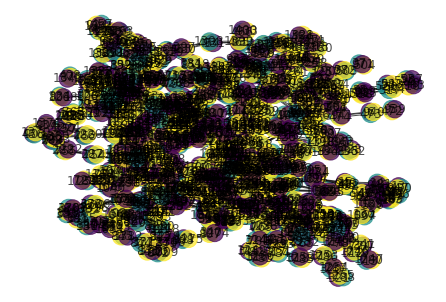

In [244]:
DrawGraph(G,colors)

In [245]:
# Get the minimum number of graph coloring needed
colors_set = set()
for i in colors:
    colors_set.add(i)

minimum_color = len(colors_set)
print("at least "+str(minimum_color)+" colors")

# get a dict for {color:[nodes]}
result_dict = {}
for i in range(len(colors)):
    if colors[i] not in result_dict:
        result_dict[colors[i]]=[]
    result_dict[colors[i]].append(i+1)
# result_dict
# Note that the Index in the figure starts from 0, here is 1

at least 3 colors


## step 7 Store color and node relationships

In [246]:
# list lengths are not equal, in order to store correctly, fill with -1
save_dict = copy.deepcopy(result_dict)
max_len = 0
for k,v in save_dict.items():
    max_len=max(max_len,len(v))
for k,v in save_dict.items():
    if len(v)<max_len:
        for i in range(max_len-len(v)):
            v.append(-1)
# save_dict

In [247]:
import pandas as pd
save = pd.DataFrame(save_dict)

save.to_csv('../data/graphColor/'+str(file_number)+'_'+str(n_ip)+'_cipr.txt',sep=' ',index=False)

In [248]:
# Establish a mapping relationship between nodes and IP cores
types_list=(data[-1].strip().split(' '))*3
print(types_list)
# types
node_list = []
for i in range(1,3*node_number+1):
    node_list.append(i)
print(node_list)
node_ip = dict(zip(node_list,types_list))
print(node_ip)
# 开始转换
for key in result_dict:
    each_list = []
    for each in result_dict[key]:
        each_list.append(node_ip[each])
    result_dict[key]=each_list
    
print(result_dict)

['0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1',

In [249]:
save_dict = copy.deepcopy(result_dict)
max_len = 0
for k,v in save_dict.items():
    max_len=max(max_len,len(v))
for k,v in save_dict.items():
    if len(v)<max_len:
        for i in range(max_len-len(v)):
            v.append(-1)
save_dict

save = pd.DataFrame(save_dict)

save.to_csv('../data/graphColor/'+str(file_number)+'_'+str(n_ip)+'_cip.txt',sep=' ',index=False)

## step 8 Generate weight matrix and store

In [250]:
# Generate weight matrix
# Read the weight data provided by the manufacturer
vendor_weight = pd.read_csv('../data/rawData/weight.csv')

s,col = vendor_weight.shape


weightMatrix = zeros((s,minimum_color),dtype=int) # the minimum number of graph coloring needed

In [251]:
# All are trusted IP cores, calculated directly at vendor1 price
if n_ip==len(typeSetSeq):
    totalprice=0
    for each in typeSetSeq:
        totalprice += vendor_weight[each][0] # Columns, rows Calculated at the price of vendor1
    print(totalprice)
# Has a trusted IP core, calculated at vendor1 price
elif n_ip>0 and n_ip<len(typeSetSeq):
    frontSeq  = typeSetSeq[:n_ip]  # Trusted ip core
    print(frontSeq)
    # Consider the price of vendor1 as the price of the trusted IP core
    for key in result_dict: # Color fill column
        i=0 
        while i<s:  # each row
            totalprice = 0
            d_set = set()
            # Color: IP core corresponding to the corresponding node
            for each in result_dict[key]:
                if each in d_set:
                    continue
                else:
                    d_set.add(each)
                    if each in frontSeq:  # Trusted ip core
                        totalprice += vendor_weight[each][0] # Columns, rows Calculated at the price of vendor1
                    else: # Is an untrusted ip core
                        totalprice += vendor_weight[each][i] # Columns, rows
            weightMatrix[i][key-1]=totalprice
            i+=1
    print(-weightMatrix.T)
else:
    # Are untrusted IP core calculations
    for key in result_dict: # Color fill column
        i=0 
        while i<s:  # each row
            totalprice = 0
            d_set = set()
            # Color: IP core corresponding to the corresponding node
            for each in result_dict[key]:
    #             print(each)
                if each in d_set:
                    continue
                else:
                    d_set.add(each)
                    totalprice += vendor_weight[each][i] # Columns, rows
            weightMatrix[i][key-1]=totalprice
            i+=1
    print(-weightMatrix.T)

2544


In [252]:
# save weight
import numpy as np
np.savetxt("../data/graphColor/"+str(file_number)+'_'+str(n_ip)+'_weight.txt',-weightMatrix.T,fmt="%d")